<a href="https://colab.research.google.com/github/AstridJV/eye-amsterdam/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://static.wincacademy.nl/logos/main-logo.png" height=200px style="height: 200px"/>

In [1]:
!pip install matplotlib --user > /dev/null
!pip install numpy --user > /dev/null

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Introduction to Data Analysis: Simple Linear Regression

## Guesstimating

> *Guesstimation: an estimate based on little information, being little better than a guess.*

Let's say we have some data about the average price that houses were sold for in a given year.

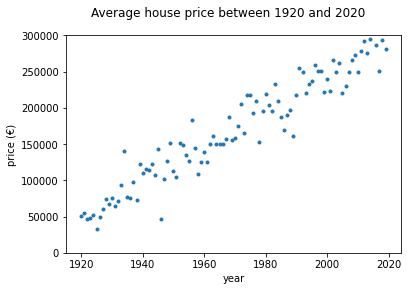

In [2]:
# Generate some example data
# In reality we wouldn't know about the variables we use here
y_start = 50000
size = 100
a = 2400
years = np.arange(1920, 2020)
b = -4558000
noise = 20000 * np.random.randn(size)
prices = a * years + b + noise

# Plot the data
def plot_data(fig, ax, x, y):
    ax.plot(x, y, '.', label='data')
    ax.set_ylim([0,300000])
    ax.set_xlabel('year')
    ax.set_ylabel('price (€)')
    fig.suptitle('Average house price between 1920 and 2020')
    return fig, ax
    
fig, ax = plt.subplots()
plot_data(fig, ax, years, prices);

From inspecting the plot we can see that the average price of a house went up between 1920 and 2020. It would be nice if we could make this observation a little more precise.

**1. Just by looking at the graph, what was the average price of a house in the twenties, approximately?** 

*TODO: Your answer here* 50.000

**2. What was the average price of a house in the seventies, approximately?**

*TODO: Your answer here* 190.000

**3. How about the period between 2010 and 2020?**

*TODO: Your answer here* 280.000

**4. Based on your answers above, how much does the average price of a house increase each year?**

*TODO: Your answer here* (3) average 2015 = 280.000
(1) average 2015 - 1920 = 280.000 - 50.000 = 230.000 / 95 = eur 2.421.

Your answer to question 4 is probably a reasonable guess. But we can do better using *linear regression*.

## Lines

Let's assume the data is roughly distributed around a line that describes the underlying trend.

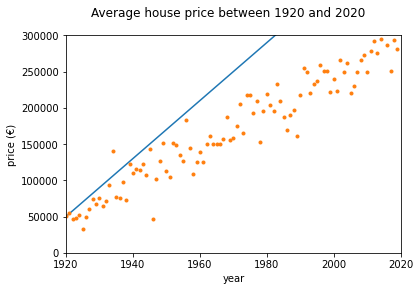

In [3]:
x = np.arange(1920,2020)
y = -7630000 + 4000 * x

fig, ax = plt.subplots()
ax.set_ylim([0,300000])
ax.set_xlim([1920, 2020])
ax.plot(x,y)
fig, ax = plot_data(fig, ax, years, prices)

**5. Does this line accurately describe the pattern that you see in the data? Why/why not?**

*TODO: Your answer here.* No, it is not following the majority of the input, the angle should be more horizontal. It indicates around 1980 already a price of eur 300000.

There are two properties we can tweak to make the line more accurate:

- The *intercept* of the line; at what point does the line cross the y-axis?
- The *slope* of the line; how steep the line goes up or down.

Here are a few examples of lines with different y-intercepts and slopes.

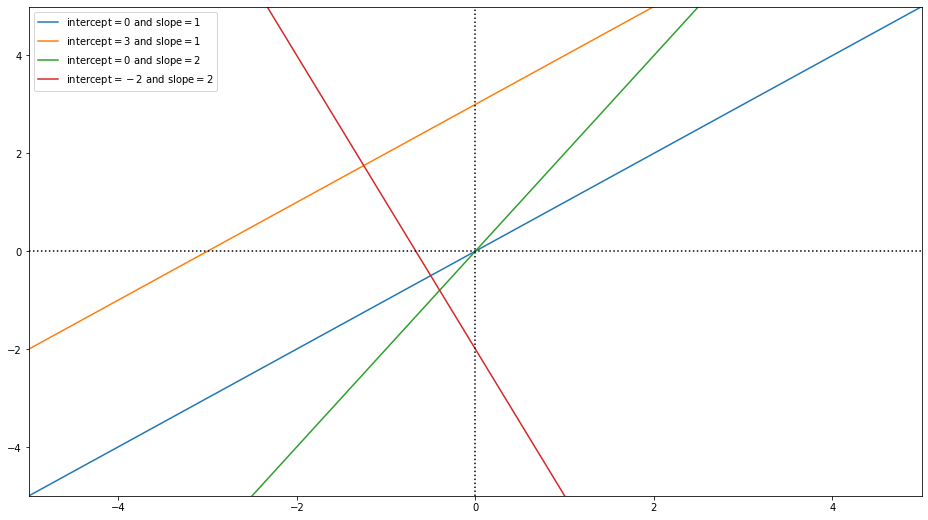

In [4]:
x = np.arange(-10, 10)

fig, ax = plt.subplots(1, figsize=(16,9))

ax.set_ylim([-5, 5])
ax.set_xlim([-5, 5])

ax.plot(x, x, label='intercept$=0$ and slope$=1$')
ax.plot(x, 3 + x, label='intercept$=3$ and slope$=1$')
ax.plot(x, 2*x, label='intercept$=0$ and slope$=2$')
ax.plot(x, -2 + -3*x, label='intercept$=-2$ and slope$=2$')

ax.axhline(y=0, linestyle=':', color='k')
ax.axvline(x=0, linestyle=':', color='k')
ax.legend();

Modify the values in the cell below as indicated by the comments and run the cell to see how the slope and intercept of a line affects its position and trajectory.

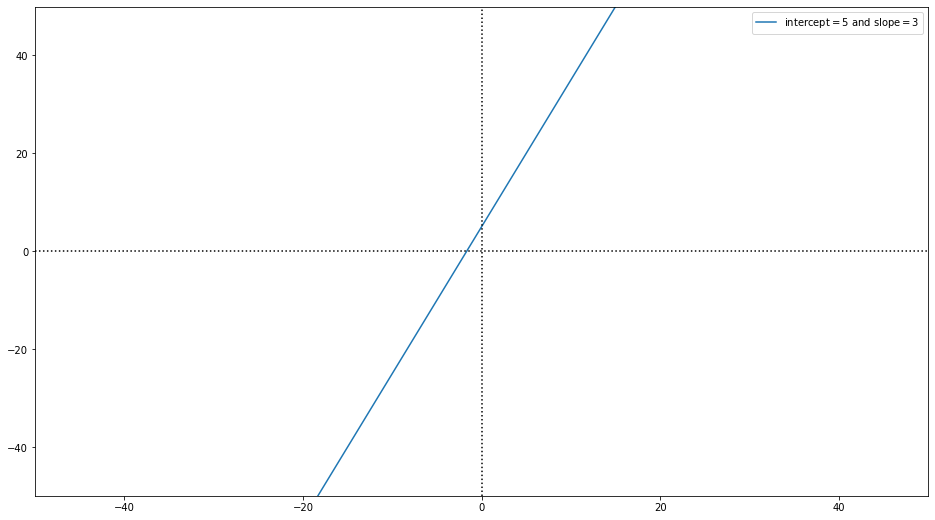

In [7]:
# MODIFY THESE VARIABLES.
slope = 3
intercept = 5
# DON'T MODIFY ANYTHING BELOW THIS LINE.

x = np.arange(-50, 50)
fig, ax = plt.subplots(1, figsize=(16,9))
ax.set_ylim([-50, 50])
ax.set_xlim([-50, 50])
ax.plot(x, intercept + slope * x, label=f'intercept$={intercept}$ and slope$={slope}$')
ax.axhline(y=0, linestyle=':', color='k')
ax.axvline(x=0, linestyle=':', color='k')
ax.legend();

**6. Does a line with a slope of -2 go up or down?**

*TODO: Your answer here.* down

**7. If a line has slope 3 and intercept 5, at what point does it cross the y-axis?**

*TODO: Your answer here.* x=0 y=5

**8. Imagine line A has slope $5$ and intercept $10$, and line B has slope $50$ and intercept $15$. Do the two lines cross?**

*TODO: Your answer here.* Hmm don't see it anymore!

**9. Imagine line A has slope $5$ and intercept $10$, and line B has slope $50$ and intercept $5$. Do the two lines cross?**

*TODO: Your answer here.* Also not, just saw it but no. Got to repeat this again or look it up.

## Line Fit

Here's the line from before again.

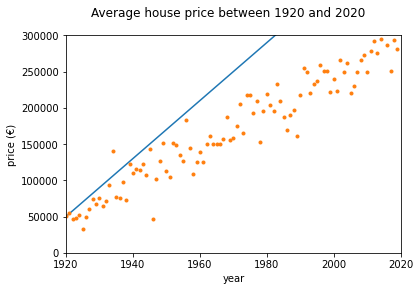

In [8]:
x = np.arange(0,2050)
y = -7630000 + 4000 * x

fig, ax = plt.subplots()
ax.set_ylim([0,300000])
ax.set_xlim([1920, 2020])
ax.plot(x,y)
fig, ax = plot_data(fig, ax, years, prices)

In order to improve the *fit* of this line, we need some way of evaluating how well it fits right now. In other words, we need a concrete way to grade lines on their fit. We will use the *Mean Squared error (MSE)*. Here's how the MSE works on an intuitive level:

1. You have a dataset of known outcomes.
2. You have a line that attempts to show the underlying pattern of these outcomes.
3. For each outcome in our dataset, measure the distance from the real outcome to the predicted outcome as indicated by the line. While doing so, count farther distances for more than closer ones.
4. Take the mean of all these measurements.
5. The smaller the result, the better the fit of the line.

**10. Have a look at the lines below. Which line probably has the smallest MSE? Why?**

*TODO: Your answer here.* Line C. It appears that the distance from the real outcome is here closer to the predicted outcome, to the datapoints.

**11. Do you think it's possible to adjust the slope and intercept to make an even better line? Why?**

*TODO: Your answer here.* Yes. Intercept look good, but the slope needs to be adjusted, going more down (-/-)

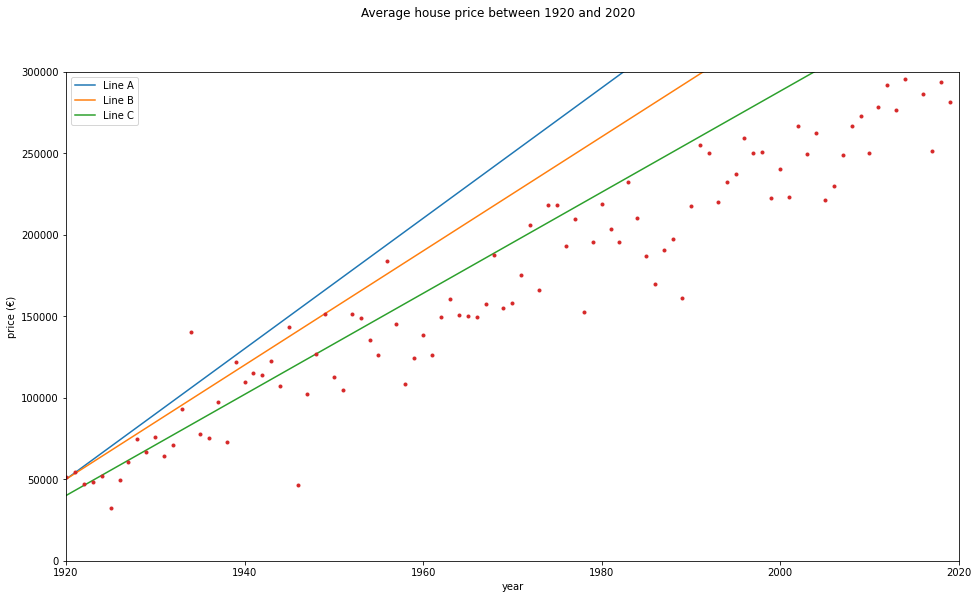

In [9]:
x = np.arange(1920,2020)
y = x

y_a = -7630000 + 4000 * x
y_b = -6670000 + 3500 * x
y_c = -5912000 + 3100 * x

fig, ax = plt.subplots(figsize=(16,9))
ax.set_ylim([0,300000])
ax.set_xlim([1920, 2020])
ax.plot(x, y_a, label='Line A')
ax.plot(x, y_b, label='Line B')
ax.plot(x, y_c, label='Line C')
ax.legend()
plot_data(fig, ax, years, prices);

Let's calculate the MSE for each of these lines and put your answers to the test. We perform the steps as specified before.

In [10]:
# 1. We have data
prices

# 2. We have 3 lines that we're going to calculate the MSE of.
y_a
y_b
y_c

n_datapoints = len(prices)
MSE_a = MSE_b = MSE_c = 0
# 3. For each datapoint...
for i in range(n_datapoints):
    # 3. Calculate distance to the line and let farther distances count for more
    MSE_a += (y_a[i] - prices[i])**2
    MSE_b += (y_b[i] - prices[i])**2
    MSE_c += (y_c[i] - prices[i])**2
    
# 4. Take the mean of all these measurements
MSE_a = MSE_a.mean()
MSE_b = MSE_b.mean()
MSE_c = MSE_c.mean()

print(f'MSE_a={MSE_a}, MSE_b={MSE_b}, MSE_c={MSE_c}')

# 5. The smaller the result, the better the line.
line_names = ['A', 'B', 'C']
winner = np.argmin([MSE_a, MSE_b, MSE_c])
print(f'The best line so far is: {line_names[winner]}')

# BONUS: the Python library we use -- NumPy -- can perform operations on entire arrays of numbers 'at once'.
# This is faster than looping over the arrays manually.
((y_c - prices)**2).mean();

MSE_a=863978545582.9696, MSE_b=426928787122.5132, MSE_c=138064543632.4111
The best line so far is: C


## Simple Linear Regression

Now that you know about lines and how to judge how well they fit the data exactly by using the MSE, let's talk about finding values for the *slope* and *intercept* that make for the best line. Linear regression is a great way to find these values. It's a supervised machine learning method.

- *Supervised* means the method relies on a dataset of known outcomes. The alternative is *unsupervised* learning, where the algorithm uses a dataset without known outcomes, or it needs access to a simulation or the real world to try out different things and gather data on its own.
    - An example of a dataset with known outcomes is a series of dates with the amount of ice cream that was sold on those dates by an ice cream company last July.
    - An example of a dataset without known outcomes is a set of images without any information of what can be seen on the images, and in which position.
- *Machine learning* is the concept of programming a computer to find a pattern for us, instead of finding the pattern ourselves.

**12. We can only do linear regression if we have a "dataset of known outcomes". In our example dataset of average house prices introduced previously, what is/are the input variable(s) and what is the outcome?**

*TODO: Your answer here.* input=year and outcome = average house price.

It turns out there is a quick, mathematical way to do linear regression and find the values for the slope and intercept that *minimize* the MSE for some dataset. We've implemented it for you here. Don't worry about understanding the math here. The important principle to understand is that we're setting the slope and intercept to the values that make for the smallest MSE possible.

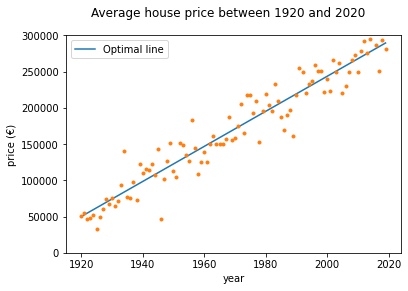

In [11]:
# Find the best value for the slope that minimizes the MSE for the line
optimal_slope = ((np.sum(years * prices) - np.mean(years) * np.mean(prices) * prices.shape[0])
                 /
                 (np.sum(years**2) - prices.shape[0] * np.mean(years)**2))

# Find the best value for the intercept that minimizes the MSE for the line
optimal_intercept = np.mean(prices) - optimal_slope * np.mean(years)

# Apply the values we found by using linear regression to make some predictions.
predictions = optimal_intercept + optimal_slope * years

# Plot the result
fig, ax = plt.subplots()
ax.plot(years, predictions, label='Optimal line')
ax.legend()
plot_data(fig, ax, years, prices);

Great! We have a beautiful line that describes the underlying pattern.

**13. Did you expect the optimal line to look like this? Why? Why not?**

*TODO: Your answer here.* Yes. about. Cannot see exactly. Where the datapoints are the closest to the predicted average the optimal line is ok but there are always maybe possibilities that the line doesnot go through the mean.

One very useful thing we can do now that we have the values for the slope and intercept is *extrapolation*. Extrapolation means generalizing the pattern of some dataset to points beyond the dataset itself. For example, here we have data up to the year 2020. We can *extrapolate* and make a prediction for what the average price of a house will be in 2030 by seeing where the line is at that point.

In [22]:
def predict(intercept, slope, year):
    return intercept + slope * year

# MODIFY THE LINE BELOW AND RERUN THE CELL
year = 1890
# DO NOT MODIFY LINES BELOW THIS POINT
print(f'€{predict(optimal_intercept, optimal_slope, year)}')

€-22587.546687955037


**Questions**

**14. Make a prediction for 2030, 2040 and 2150. What do you think about the predictions -- how confident are you that they will turn out to be correct? Explain.**

*TODO: Your answer here.* 2030=316.093 2040=340.284 2150=606.391 Appears a bit weird. Why should prices only go up gradually, we know from experience that in average sometimes for a period (so e.g. 10 years) a steep drop in prices can occur, depending on economics, wars all kind of things. Not so confident on the outcome.

**15. Do the same for 1910, 1900 and 1890. Are the predictions realistic? Why/why not?**

*TODO: Your answer here.* 1910=25.795 1900=1.603 1890=-22.587 absolutily not credible. 1910 is possible, but 1900 and 1890 not feasible. in 1890 you are paid instead of paying for a house!

**16. What could we do to improve our predictions?**

*TODO: Your answer here.* Gather more data, maybe per month. Or add something like inflation rates, how much money people earn and can afford for a house.

## There's More

This lesson was about understanding simple linear regression, a version of linear regression that deals with one input variable and a model defined only by a slope and intercept. In other words: simple linear regression works with a 2D line.

There are more complex versions of linear regression that make use of more *variables* (like the year and average price) and *parameters* (like slope and intercept).

Finally, here's an example of data with a different underlying pattern and a line that minimizes the MSE.

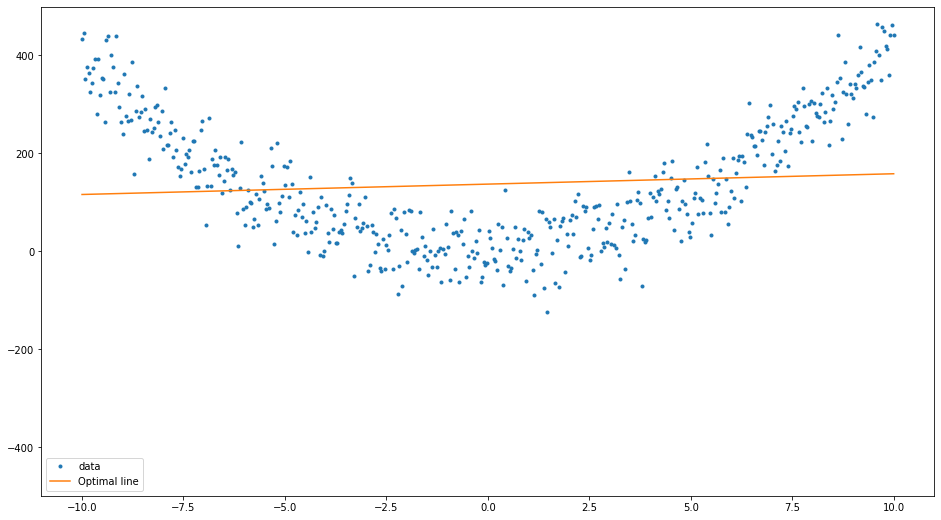

In [24]:
x = np.linspace(-10, 10, num=500)
w0, w1, w2 = 3, 2, 4
y = w0 + w1 * x + w2 * x**2+ np.random.randn(x.shape[0]) * 50

optimal_slope = ((np.sum(x * y) - np.mean(x) * np.mean(y) * y.shape[0])
                 /
                 (np.sum(x**2) - y.shape[0] * np.mean(x)**2))
optimal_intercept = np.mean(y) - optimal_slope * np.mean(x)

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(x, y, '.', label='data')
ax.set_ylim([-500,500])
ax.plot(x, optimal_intercept + optimal_slope * x, label='Optimal line')
ax.legend();

**Questions:**

**17. Does this line accurately describe the pattern in the data? Why/why not? Could this change if we were to zoom further out or in? Why?**

*TODO: Your answer here.* No the data are in a curve, so the line has to be in a curve as well.

**18. What does your answer to question 1 mean for predictions made using this line?**

*TODO: Your answer here.* The prediction has no use, is worthless.

**19. Is gathering more data a good way to improve the line here? Why/why not?**

*TODO: Your answer here.* Don;t see why gathering more data will help. It looks like it has a different pattern (the way how datapoints are distributed) and it will not end up as a line.

**20. What can we do to improve the line?**

*TODO: Your answer here.* Make it a curve, if possible? to fit.

For all possible answers to the final question: there probably are ways to implement your ideas. And that is what data analysis is all about! Well done, you've reached the end of this lesson. You should now have an intuitive understanding of how linear regression works.